In [2]:
import numpy as np
import matplotlib.pyplot as plt

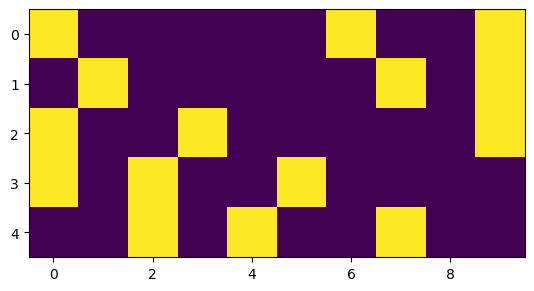

In [ ]:
time_limit = 5
road_length = 10
car_density = 0.2


positions_seed = np.random.choice([0, 1], road_length, p=[1-car_density, car_density])
acceleration = 1
deceleration = -1
max_speed = 2


brake_chance = 0
brake_deceleration = -5


look_ahead_global = min(np.size(positions_seed), 2)


def get_neighbors(road, index, look_ahead):
    look_ahead = min(np.size(road), look_ahead)

    neighbors = [0]*look_ahead

    for i in range(index+1, index+look_ahead):
        neighbors[i-(index+1)] = road[i%np.size(road)]
    
    return neighbors

def get_velocity_change(road, index, look_ahead):
    if road[index] == 1:
        if np.random.rand() < brake_chance:
            return brake_deceleration
        elif any(get_neighbors(road, index, look_ahead)):
            return deceleration
        else:
            return acceleration
    return 0


# data[t][x][0] is whether there is a car at x at time t, data[t][x][1] is the current velocity (affects next position) of the car in that place
data = np.zeros((time_limit, road_length, 2), dtype="int8")

velocities_seed = np.zeros(np.shape(positions_seed))

for i in range(np.size(velocities_seed)):
    velocities_seed[i] = max(0, min(max_speed, get_velocity_change(positions_seed, i, look_ahead_global)))

data[0] = np.column_stack((positions_seed, velocities_seed))
for t in range(1, np.size(data, axis=0)):
    for x in range(np.size(data, axis=1)):
        new_x = (x + data[t-1][x][1])%road_length
        if (data[t-1][x][0] == 1):
            data[t][new_x][0] = data[t-1][x][0]
            data[t][new_x][1] = data[t-1][x][1]

    for x in range(np.size(data, axis=1)):
        velocity_change = get_velocity_change(data[t][:, 0], x, look_ahead_global)
        data[t][x][1] = max(0, min(max_speed, data[t][x][1] + velocity_change))


positions = data[:, :, 0]
plt.imshow(positions)
plt.show()